In [1]:
from src.utils import image_utils
from src.utils import notebook_utils

from src.process import feature_extraction, automatic_ordering
import cv2
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
images = image_utils.load_raw_images("PanoramaWebDataset")
print("load sucess")

load sucess


In [3]:
print(len(images))

6


## Algoritmo

In [5]:
import random

indices = list(range(len(images)))
random.shuffle(indices)

# Get values as a list
names = list(images.keys())
values = list(images.values())

# Reorder both lists using the shuffled indices
names_shuffled = [names[i] for i in indices]
values_shuffled = [values[i] for i in indices]

In [6]:
images_unordered = values_shuffled

In [7]:
kp_descs = [feature_extraction.SIFT(img, nfeatures=1000) for img in images_unordered]

## Grafo

Vamos gerar um grafo onde cada nó é uma imagem e cada aresta a quantidade de matches

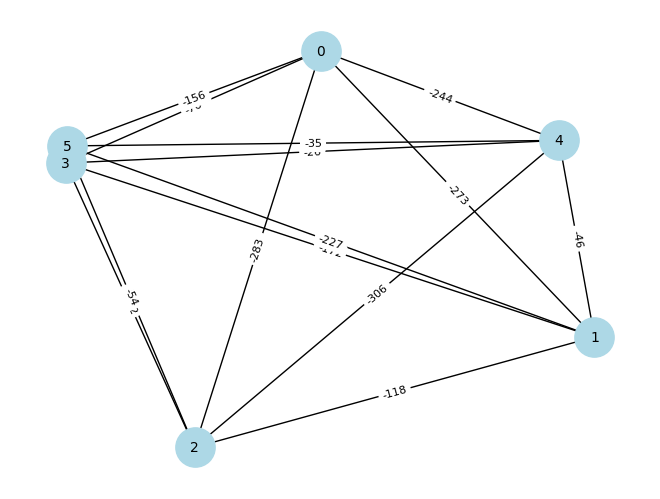

In [8]:
G = automatic_ordering.build_match_graph(kp_descs, len(images))

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Layout for positioning
nx.draw(G, pos, with_labels=True, node_size=800, node_color="lightblue", font_size=10)

# Draw edge labels (weights)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

plt.show()

### Primeira ideia: arvore geradora mínima

In [9]:
mst = nx.minimum_spanning_tree(G, weight="weight", algorithm="kruskal")

print("Edges in MST:")
for u, v, w in mst.edges(data=True):
    print(f"{u} - {v} (weight {w['weight']})")

Edges in MST:
0 - 2 (weight -283)
0 - 1 (weight -273)
1 - 5 (weight -227)
1 - 3 (weight -172)
2 - 4 (weight -306)


A árvore não necessariamente será um caminho, sendo assim, não é possível determinar qual imagem fica a direita de qual

### Ideia 2: caminho hamiltoniano

o caminho de custo mínimo. É um problema NP completo, mas como N (número de imagens) é assumido pequeno, podemos fazer um brute force, ou usar uma heurística

In [16]:
path = automatic_ordering.hamiltonian_path_brute_force(G)
print("Hamiltonian path:", path)

Hamiltonian path: [3, 5, 1, 0, 2, 4]


In [17]:
unshuffled_names = [names_shuffled[i] for i in path]
unshuffled_names

['1', '2', '3', '4', '5', '6']

In [ ]:
# path = automatic_ordering.hamiltonian_path_heuristic(G)
# print("Hamiltonian path (heuristic):", path)

Hamiltonian path (heuristic): [0, 1, 2, 3, 4, 5]


Tanto o brute force como a heurística acharam o caminho correto